# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Load the Data

In [2]:
# Load the dataset
df = pd.read_csv('Datasets/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
# Getting information from the dataset, like the data types of columns and memory usage.
# 9 object, 10 integer, 7 float and the memory usage is 10.3 MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [4]:
# We have 52000 rows and 26 columns
df.shape

(52000, 26)

In [5]:
# This is the first 5 values in dataset
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [6]:
# Getting information about the numerical values of the dataset to understand the central tendencies.
# We can have at least an idea about the numerical dataset distribution.
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [7]:
# Get the number of duplicated rows in the dataset
df.duplicated().sum()

43

In [8]:
# Get the number of null values in each column
df.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [9]:
# Creating a copy of the dataframe to use it for scaling and encoding and other operations like dimensionality reduction and others. but still have the original dataset for visualization later.

df_scaled = df.copy()

In [10]:
# Features Selecting
# Police_Force & Did_Police_Officer_Attend_Scene_of_Accident are not useful for the analysis that we will do. we want to analyze the accidents based on the severity and why it happened and where usually. but these 2 features gives me what happened next which doesn't concent the analysis.
# Pedestrian_Crossing-Human_Control & Pedestrian_Crossing-Physical_Facilities the same as the above 2 feauteres. they are useless for my anlaysis about the accidents.
# The rest of the features are important for the analysis that we will do.

# There is a chance to drop the Date & Day_of_Week columns because it doesn't gonna affect the analysis that much. you will know that from the plots, but I will still include them to see the analysis and will try in the future to drop them and see the difference.

df_scaled = df_scaled.drop(columns=['Police_Force','Did_Police_Officer_Attend_Scene_of_Accident','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'], axis=1)

In [11]:
# Creating a function to remove the outliers with IQR method

def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Trying with remove the outliers from the numerical datasets
# I'm going to cancel this step due to the issue of deleting around 80% of the dataset while removing the outliers.
# for i in df_scaled.select_dtypes(exclude=['object']).columns:
#     df_scaled = remove_outliers(df_scaled,i)

In [12]:
# Dropping the null values due to the small number of them which could not affect the dataset if I drop them.
df_scaled = df_scaled.dropna()

In [13]:
# Dropping duplicates due to duplication of this dataset would be impossible, so it has to be error in the dataset.
df_scaled.drop_duplicates(inplace=True)

In [14]:
# Standarise the columns to make the distribution

ss = StandardScaler()
# for i in df_scaled.select_dtypes(exclude='object').columns:
#     df_scaled[i] = ss.fit_transform(df_scaled[[i]])

# Didn't use the standard scaler due to make the model worse and the silhouette score was lower than the original dataset.

In [15]:
# Using one hot encoding to the catagorical columns to make them numerical columns.

catagorical_columns = df_scaled.select_dtypes(include='object').columns
df_scaled= pd.get_dummies(df_scaled,columns=catagorical_columns,drop_first=True)

In [16]:
# Just to see how many columns after the encoding
df_scaled.shape

(49986, 3528)

In [17]:
# using dimensionality reduction to reduce the number of columns even after one hot ecnoding increased the number of columns

# Switch the dataframe to numpy array to ease the calculation of the mean and standard deviation
numpy_df = df_scaled.to_numpy()

# Calculating the z-value for the dataset
Z = (numpy_df - numpy_df.mean())/numpy_df.std()

# calculating 90% of the variance to reduce the number of columns and make the dataset more efficient
# especially when i don't what should the number of the new columns should be.
# so using n_components=0.9 to get the number of columns that represent 90% of the variance.
pca = PCA(n_components=0.9)
pca.fit(Z)
pca_data = pca.transform(Z)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [18]:
# Feature selection would be before the catagoricla encoding, so it can select and drop depend on the column
# the same cells in the top, I choosed to select it before the encoding for the pca and to use it in the model effectively.

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

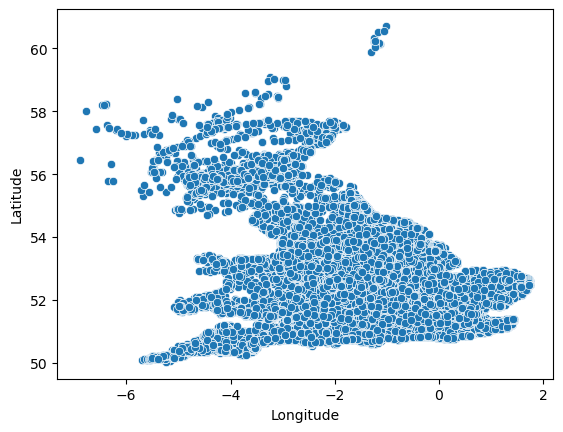

In [19]:
# we cna see the map of the traffic accidents in the dataset
# If I'm not wrong this is the UK map, so we can see the distribution of the accidents in the UK.

sns.scatterplot(x=df['Longitude'],y=df['Latitude'])

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

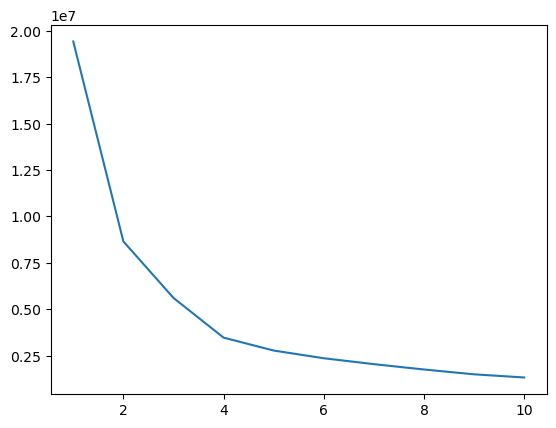

In [20]:
# Using elbow method to get the best number of clusters in kmeans
# calculating the inertia of each model with different number of clusters.

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# plot the inertia of the models to know the best value of the clusters
plt.plot(range(1,11),wcss)
plt.show()

# we can see from the graph that the best value is 4
# 2 is good, too. we can use all of them to test and see the best one.

In [27]:
# using n_clusters=9 to get the best prediction

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(pca_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [28]:
pred_kmeans = kmeans_model.predict(pca_data)

# using silhouette_score to evaluate the model and see how good it is.
print(silhouette_score(pca_data,kmeans_model.labels_))

0.5416372066440301


## Plot the data points with their predicted cluster center

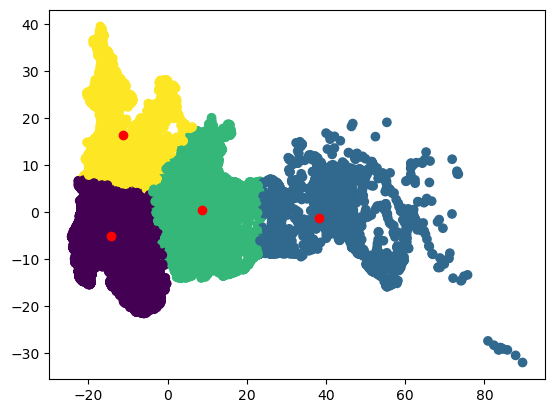

In [29]:
# plot the clusters with the centers to see the distribution of the clusters
# and to see if the silhouette_score is good or not.

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pred_kmeans)

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

### Justify Your Feature Selection:
- I choosed clustering becuase of unlabeled data. What I mean by unlabeled data even though we have a columns names, I mean that the result is hard to find from relationships and others. Becuase there are many features and a huge dataset and number of unique values in each feature, it's hard to get the relationship between them using supervised models. In additions, the data has many columns that it's hard to identify the relationship between them using logic.
- I deleted "Police_Force" & "Did_Police_Officer_Attend_Scene_of_Accident" & "Pedestrian_Crossing-Human_Control" & "Pedestrian_Crossing-Physical_Facilities" columns due to having no logical impact in the analysis that we want which is analysis of the accident itself. these 4 columns usually describe something unrelated to the accident or something happened after the accident which change nothing in the analysis of why the accident happened and what are the reasons behind it.

### Number of Clusters Choices:
- I choosed the optimal number of clusters which is "2" because of the elbow method. Reading the elbow method is kind of easy, which is seeing when the line would break and change the direction, and depend on the angle if it's high angle it would be the best cluster number and if it's low it would be a good cluster but not the best.

### Evaluation:
- I used silhouette score to determine or evaluate the model and the number of the cluster itself. Silhouette score would represent how the cluster is grouping with each other with a lower variance to say this is the best cluster. if it's closer to +1 that means it's a good clustering and the variance is low, but if it's around 0 it means it still a good clustering but the variance is high so it could detect the outliers and add it to some of the clusters. The worst part if the result is around -1 which means the cluster is bad and it didn't get the features together. Depend on what we have  0.5416
- Explained before which is how silhouette give the score that resulted in each model


### Improvements and Recommendations:
- As I said we can remove the data & day of the week becuase it's normally distributed and that means the effect in the target value would be the lower that can get, and that's why deleting them would just change the time spent to calculate in the model
- It could change the number of components in the pca, like testing different number but because of the time it's hard to test it due to 0.9 n_components took around 10 mins to finish the dimensionality reduction
- It could test more than 10 number of clusters due to the number of huge in columns but still the same as the pca number of components it take time to test the 10 iteration of the clusters to get the elbow method.
- We can test with different number of features until we get a good relationships.
- We could use different measures of the unsupervised or different models like using the DBSCAN as different model or different measure like adjusted rand score or any other metrics for clustering.
